# Facebook Stocks

### Loading Packages:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import csv
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import date
import matplotlib.dates as mdates
from sklearn import linear_model
import datetime as dt
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Loading Datasets (Clean and Merge Data):

In [2]:
# Facebook stock prices 2012-2022
FB_dataframe = pd.read_csv ('./data/FB_stock_history.csv')
FB_dataframe = FB_dataframe.drop(['Dividends', 'Stock Splits', 'Volume'], axis=1)
FB_dataframe['Date'] = pd.to_datetime(FB_dataframe['Date'])

In [3]:
# Facebook MAU 2008-2022
# (https://www.statista.com/statistics/264810/number-of-monthly-active-facebook-users-worldwide/)
MAU_datafame = pd.read_csv ('./data/FB_MAU.csv')
MAU_datafame['Date'] = pd.to_datetime(MAU_datafame['Date'])
MAU_datafame.head()

# Add MAU to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, MAU_datafame, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB MAU (millions)'] = temp['MAU (millions)']

In [4]:
# Major social media stock prices 2012-2022
# (https://www.kaggle.com/datasets/prasertk/major-social-media-stock-prices-20122022)
sm_dataframe = pd.read_csv ('./data/social_media_stock.csv')
sm_dataframe['Date'] = pd.to_datetime(sm_dataframe['Date'])

# Add Major social media stock prices to Main FB_dataframe
copanies = ['TWTR', 'SNAP'] # Twitter, Snapchat
for company in copanies:
    company_df = sm_dataframe[sm_dataframe['Symbol']==company]
    temp = pd.merge_asof(FB_dataframe, company_df, on='Date', tolerance=pd.Timedelta('7 days'))
    FB_dataframe[company+' Close'] = temp['Close_y']
FB_dataframe

Date        Open        High         Low       Close  \
0    2012-05-18   42.049999   45.000000   38.000000   38.230000   
1    2012-05-21   36.529999   36.660000   33.000000   34.029999   
2    2012-05-22   32.610001   33.590000   30.940001   31.000000   
3    2012-05-23   31.370001   32.500000   31.360001   32.000000   
4    2012-05-24   32.950001   33.209999   31.770000   33.029999   
...         ...         ...         ...         ...         ...   
2354 2021-09-27  349.809998  355.149994  347.079987  353.579987   
2355 2021-09-28  347.970001  349.600006  338.920013  340.649994   
2356 2021-09-29  343.149994  345.230011  338.880005  339.609985   
2357 2021-09-30  340.450012  342.799988  338.149994  339.390015   
2358 2021-10-01  341.609985  345.010010  338.640015  343.010010   

      FB MAU (millions)  TWTR Close  SNAP Close  
0                   955         NaN         NaN  
1                   955         NaN         NaN  
2                   955         NaN         NaN  
3                   955         NaN         NaN  
4                   955         NaN         NaN  
...                 ...         ...         ...  
2354               2910   65.370003   80.080002  
2355               2910   62.450001   74.419998  
2356               2910   60.070000   71.760002  
2357               2910   60.389999   73.870003  
2358               2912   61.980000   75.250000  

[2359 rows x 8 columns]

In [5]:
# Apple and Google Stock Price 
# (https://www.kaggle.com/datasets/vainero/google-apple-facebook-stock-price)
apple_dataframe = pd.read_csv ('./data/Apple_stock.csv')
apple_dataframe['Date'] = pd.to_datetime(apple_dataframe['Date'])
google_dataframe = pd.read_csv ('./data/Google_stock.csv')
google_dataframe['Date'] = pd.to_datetime(google_dataframe['Date'])

# Add Apple and Google Stocks to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, apple_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('7 days'))
FB_dataframe['Apple Open'] = temp['Open_y']
FB_dataframe['Apple Close'] = temp['Close_y']
FB_dataframe['Apple High'] = temp['High_y']
FB_dataframe['Apple Low'] = temp['Low_y']
temp = pd.merge_asof(FB_dataframe, google_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('7 days'))
FB_dataframe['Google Open'] = temp['Open_y']
FB_dataframe['Google Close'] = temp['Close_y']
FB_dataframe['Google High'] = temp['High_y']
FB_dataframe['Google Low'] = temp['Low_y']

In [6]:
# Facebook Net Income and Lobbying Expense
# (https://www.statista.com/statistics/223289/facebooks-quarterly-net-income/?locale=en)
# (https://www.statista.com/statistics/236969/quarterly-lobbying-expenses-of-facebook/?locale=en)
income_dataframe = pd.read_csv ('./data/FB_income.csv')
income_dataframe['Date'] = pd.to_datetime(income_dataframe['Date'])
lobbying_dataframe = pd.read_csv ('./data/FB_lobbying.csv')
lobbying_dataframe['Date'] = pd.to_datetime(lobbying_dataframe['Date'])

# Add Apple and Google Stocks to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, income_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB Net Income (millions)'] = temp['net income (millions)']
temp = pd.merge_asof(FB_dataframe, lobbying_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB Lobbying (millions)'] = temp['lobbying expense (millions)']

In [7]:
#Datetime
FB_dataframe.dropna(inplace=True)
FB_dataframe['ordinal'] = FB_dataframe['Date'].apply(lambda x: x.toordinal())

FB_dataframe

Date        Open        High         Low       Close  \
1330 2017-08-31  170.399994  172.149994  170.059998  171.970001   
1331 2017-09-01  172.399994  172.919998  171.309998  172.020004   
1332 2017-09-05  171.270004  172.389999  169.550003  170.720001   
1333 2017-09-06  170.910004  172.479996  169.570007  172.089996   
1334 2017-09-07  171.940002  173.309998  170.270004  173.210007   
...         ...         ...         ...         ...         ...   
2354 2021-09-27  349.809998  355.149994  347.079987  353.579987   
2355 2021-09-28  347.970001  349.600006  338.920013  340.649994   
2356 2021-09-29  343.149994  345.230011  338.880005  339.609985   
2357 2021-09-30  340.450012  342.799988  338.149994  339.390015   
2358 2021-10-01  341.609985  345.010010  338.640015  343.010010   

      FB MAU (millions)  TWTR Close  SNAP Close  Apple Open  Apple Close  \
1330               2072   16.910000   14.510000   40.522499    40.314999   
1331               2072   16.860001   14.270000   40.522499    40.314999   
1332               2072   16.650000   14.490000   40.522499    40.314999   
1333               2072   16.830000   14.500000   40.522499    40.314999   
1334               2072   17.219999   15.150000   40.522499    40.314999   
...                 ...         ...         ...         ...          ...   
2354               2910   65.370003   80.080002  145.470001   145.369995   
2355               2910   62.450001   74.419998  143.250000   141.910004   
2356               2910   60.070000   71.760002  142.470001   142.830002   
2357               2910   60.389999   73.870003  143.660004   141.500000   
2358               2912   61.980000   75.250000  141.899994   142.649994   

      Apple High   Apple Low  Google Open  Google Close  Google High  \
1330   40.560001   40.090000    46.586498     46.797501    46.820499   
1331   40.560001   40.090000    46.586498     46.797501    46.820499   
1332   40.560001   40.090000    46.586498     46.797501    46.820499   
1333   40.560001   40.090000    46.586498     46.797501    46.820499   
1334   40.560001   40.090000    46.586498     46.797501    46.820499   
...          ...         ...          ...           ...          ...   
2354  145.960007  143.820007   141.585495    141.501007   142.500000   
2355  144.750000  141.690002   139.088501    136.184006   139.606506   
2356  144.449997  142.029999   137.109695    134.520996   137.398499   
2357  144.380005  141.279999   134.324997    133.265503   135.589996   
2358  142.919998  139.110001   133.554504    136.462494   137.070999   

      Google Low  FB Net Income (millions)  FB Lobbying (millions)  ordinal  
1330   46.181000                      4707                    2.85   736572  
1331   46.181000                      4707                    2.85   736573  
1332   46.181000                      4707                    2.85   736577  
1333   46.181000                      4707                    2.85   736578  
1334   46.181000                      4707                    2.85   736579  
...          ...                       ...                     ...      ...  
2354  140.500000                      9194                    5.09   738060  
2355  135.699997                      9194                    5.09   738061  
2356  134.250000                      9194                    5.09   738062  
2357  133.000000                      9194                    5.09   738063  
2358  133.377502                     10285                    5.42   738064  

[1029 rows x 19 columns]

### Basic Plots

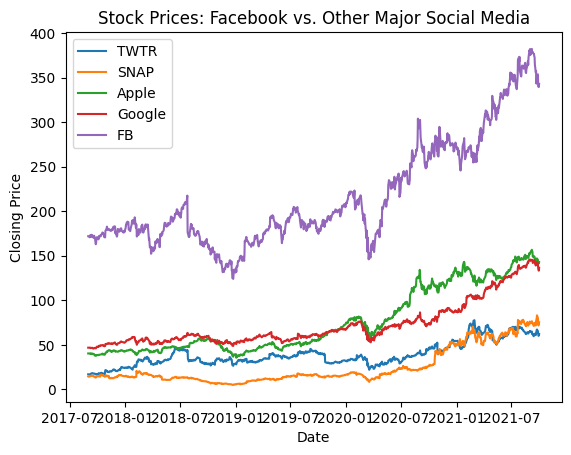

In [8]:
# Closing prices of Facebook vs Other Companies (2012-2022)
copanies = ['TWTR', 'SNAP', 'Apple', 'Google']
for company in copanies:
    plt.plot(FB_dataframe['Date'], FB_dataframe[company + ' Close'], label=company)
plt.plot(FB_dataframe['Date'], FB_dataframe['Close'], label='FB')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Prices: Facebook vs. Other Major Social Media')
plt.legend()
plt.show()

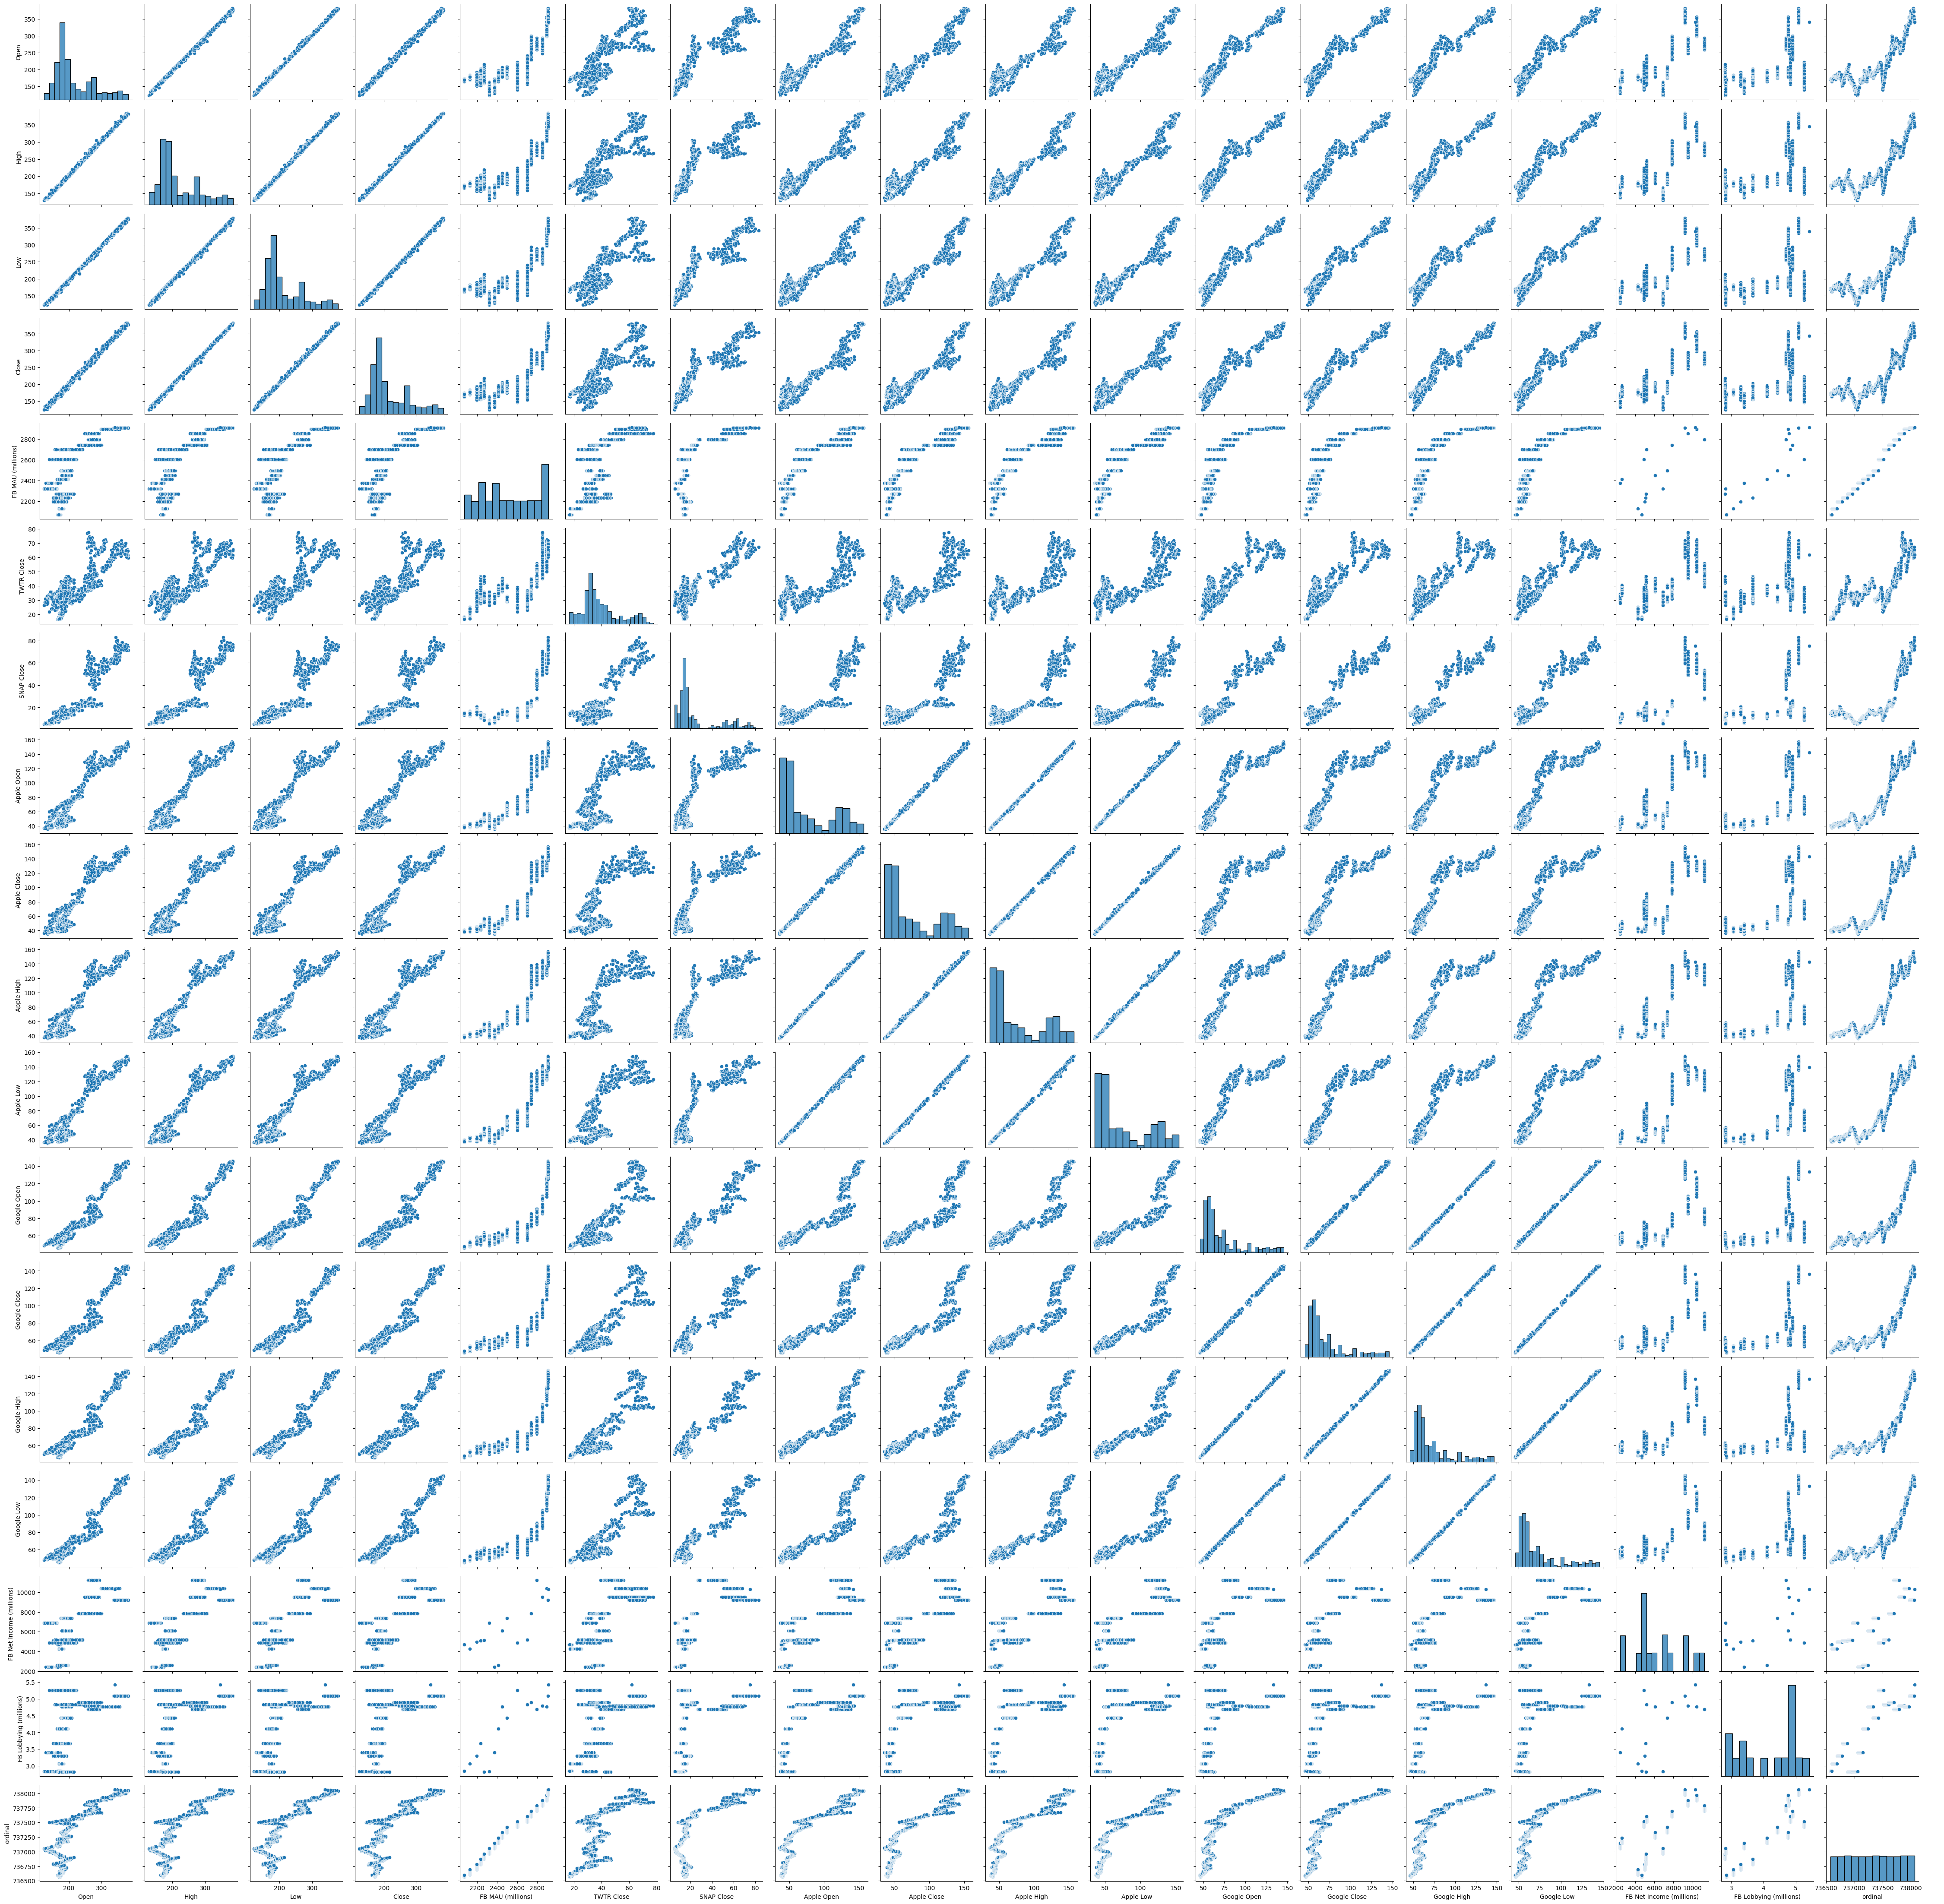

In [9]:
i = sns.PairGrid(FB_dataframe)
i.map_diag(sns.histplot)
i.map_offdiag(sns.scatterplot)
i.add_legend()

### Stock Price Prediction

Simple Linear Regression (FB Closing Price vs. Datetime)
(https://www.w3schools.com/python/python_ml_multiple_regression.asp)

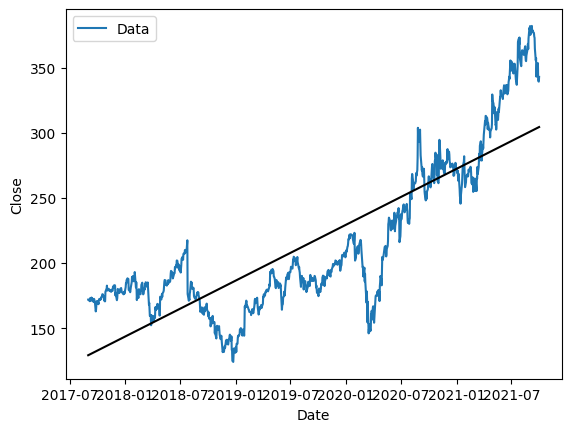

Mean squared error:  1150.1949047226065
Root Mean squared error:  33.91452350723221


In [10]:
# Split and Train Data
X = FB_dataframe[['ordinal']]
y = FB_dataframe['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = linear_model.LinearRegression()
regr.fit(X_train.values, y_train.values)

# plot data
original_x = np.array([date.fromordinal(ordinal) for ordinal in X['ordinal'].values.flatten()])
sort_index = np.argsort(X['ordinal'])
original_x = original_x[sort_index]
original_y = y.values[sort_index]

fig, ax = plt.subplots()
ax.plot(original_x, original_y, label='Data')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.legend()

# plot pred
date_range = pd.date_range(start='2017-08-31', end='2021-10-01', freq='D')
ordinal_range = date_range.to_series().apply(lambda date: date.toordinal())
y_pred = regr.predict(ordinal_range.to_numpy().reshape(-1, 1))
ax.plot(date_range, y_pred, color='k')

plt.show()

# Evaluate the performance of the model using mean squared error
y_pred_test = regr.predict(X_test.values)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('Mean squared error: ', mse)
print('Root Mean squared error: ', rmse)

Support Vector Regression (FB Closing Price vs. Datetime, Income)

In [11]:
def SVR_predict_plot(X, y):
    start_time = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model using the training data
    svr.fit(X_train.values, y_train.values)
    
    # Convert date time
    y_pred_test = svr.predict(X_test.values)

    # Evaluate the performance of the model using mean squared error
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    print('Mean squared error: ', mse)
    print('Root Mean squared error: ', rmse)

    # sort data by date
    datetime_array = np.array([date.fromordinal(ordinal) for ordinal in X_test['ordinal'].values.flatten()])
    sort_index = np.argsort(X_test['ordinal'])
    datetime_array = datetime_array[sort_index]
    y_pred_test = y_pred_test[sort_index]

    original_x = np.array([date.fromordinal(ordinal) for ordinal in X_train['ordinal'].values.flatten()])
    sort_index = np.argsort(X_train['ordinal'])
    original_x = original_x[sort_index]
    original_y = y_train.values[sort_index]
    
    # set the x-axis locator and formatter
    fig, ax = plt.subplots()
    years = mdates.YearLocator()   
    date_fmt = mdates.DateFormatter('%Y')  
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(date_fmt)

    # Plot Original
    ax.plot(original_x, original_y, label='Actual')
    ax.plot(datetime_array, y_pred_test, label='Prediction')
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.legend()
    plt.show()
    
    # run time
    end_time = time.time()
    print("SVR runtime:", end_time - start_time)

Mean squared error:  62.5341629595993
Root Mean squared error:  7.907854510523022


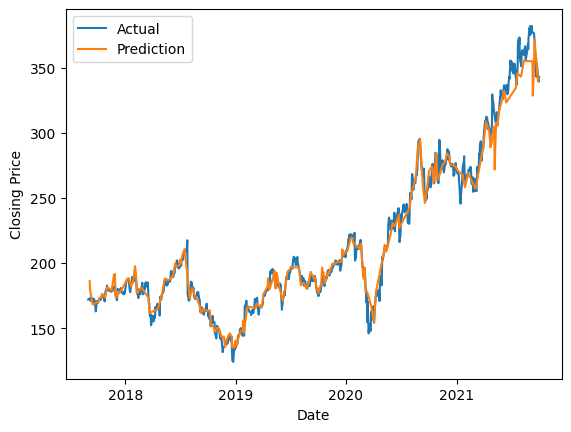

SVR runtime: 0.32611703872680664


In [12]:
# Support Vector Machines (DateTime vs Closing Price)
X = FB_dataframe[['ordinal']]
y = FB_dataframe['Close']
# Create SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1)
# Predict and Plot
SVR_predict_plot(X, y)

Mean squared error:  17.771792903114978
Root Mean squared error:  4.215660434987023


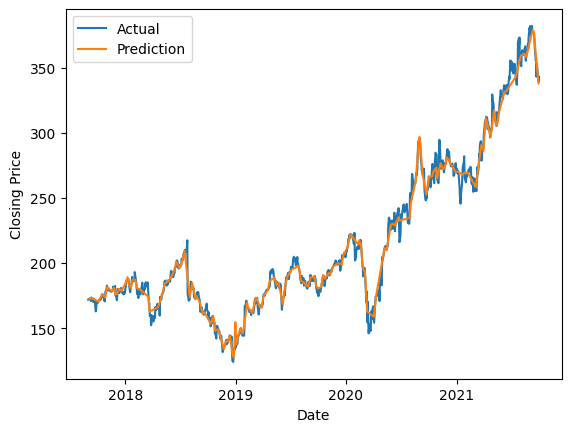

SVR runtime: 0.2602269649505615


In [13]:
# Support Vector Machines (DateTime, Net Income vs Closing Price)
X = FB_dataframe[['ordinal', 'FB MAU (millions)', 'FB Net Income (millions)']]
y = FB_dataframe['Close']
# Create SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.01)
# Predict and Plot
SVR_predict_plot(X, y)

Mean squared error:  13.034410121718784
Root Mean squared error:  3.6103199472787426


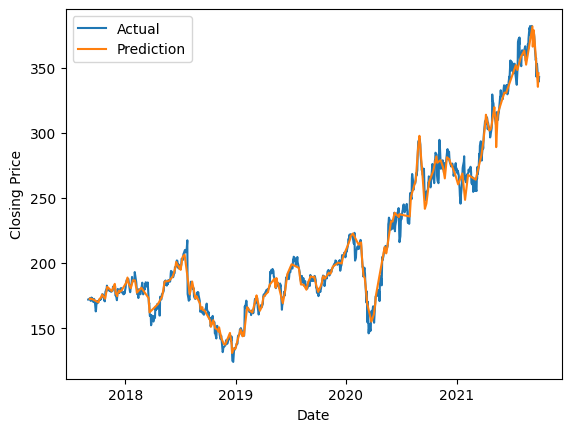

SVR runtime: 0.2941319942474365


In [14]:
# Support Vector Machines (DateTime, Net Income vs Closing Price)
X = FB_dataframe[['ordinal', 'Apple Close', 'Google Close']]
y = FB_dataframe['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.01)
# Predict and Plot
SVR_predict_plot(X, y)

Mean squared error:  22.163647550787225
Root Mean squared error:  4.707828326392884


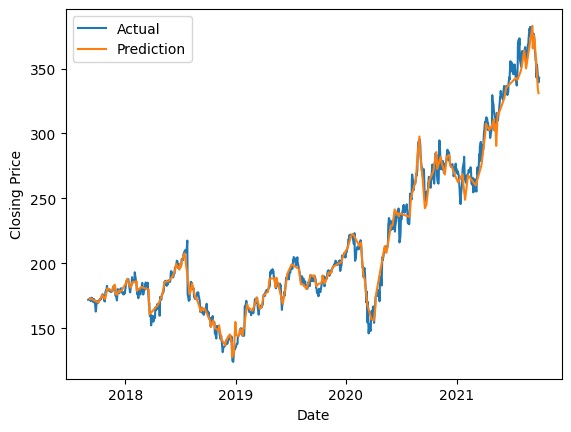

SVR runtime: 0.27852702140808105


In [15]:
# Support Vector Machines (All)
X = FB_dataframe[['ordinal', 'FB MAU (millions)', 'FB Net Income (millions)', 'Apple Close', 'Google Close', 'TWTR Close', 'SNAP Close', 'FB Lobbying (millions)']]
y = FB_dataframe['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.01)
# Predict and Plot
SVR_predict_plot(X, y)

### Stock Price Direction
(https://www.geeksforgeeks.org/predicting-stock-price-direction-using-support-vector-machines/)

In [16]:
def Stock_Trade(X, FB_dataframe):
    # Output - If tomorrow’s price is greater than today’s price then we will buy(1) else(0).
    y = np.where(FB_dataframe['Close'].shift(-1) > FB_dataframe['Close'], 1, 0)

    # Split Train/Test
    split_percentage = 0.8
    split = int(split_percentage*len(FB_dataframe))
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]

    # Support vector classifier: predict the signal (buy or sell)
    cls = SVC().fit(X_train, y_train)
    FB_dataframe['Predicted_Signal'] = cls.predict(X)

    # Train/Test Accuracy
    print("Training Accuracy")
    print(accuracy_score(y_train, cls.predict(X_train)))
    print("Testing Accuracy")
    print(accuracy_score(y_test, cls.predict(X_test)))

    # Calculate daily returns
    FB_dataframe['Return'] = FB_dataframe.Close.pct_change()

    # Calculate strategy returns
    FB_dataframe['Strategy_Return'] = FB_dataframe.Return *FB_dataframe.Predicted_Signal.shift(1)

    # Calculate Cumulutive returns
    FB_dataframe['Cum_Ret'] = FB_dataframe['Return'].cumsum()

    # Plot Strategy Cumulative returns 
    FB_dataframe['Cum_Strategy'] = FB_dataframe['Strategy_Return'].cumsum()

    # plot the data
    plt.plot(FB_dataframe['Date'], FB_dataframe['Cum_Ret'], color='red')
    plt.plot(FB_dataframe['Date'], FB_dataframe['Cum_Strategy'], color='blue')
    plt.title('Cumulative Returns Comparison')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend(['Cumulative Returns', 'Cumulative Strategy Returns'])
    plt.show()

Training Accuracy
0.5321992709599028
Testing Accuracy
0.5097087378640777


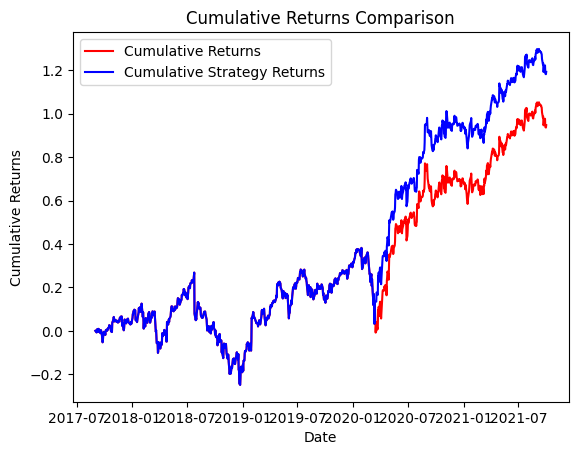

Date        Open        High         Low       Close  \
2354 2021-09-27  349.809998  355.149994  347.079987  353.579987   
2355 2021-09-28  347.970001  349.600006  338.920013  340.649994   
2356 2021-09-29  343.149994  345.230011  338.880005  339.609985   
2357 2021-09-30  340.450012  342.799988  338.149994  339.390015   
2358 2021-10-01  341.609985  345.010010  338.640015  343.010010   

      FB MAU (millions)  TWTR Close  SNAP Close  Apple Open  Apple Close  ...  \
2354               2910   65.370003   80.080002  145.470001   145.369995  ...   
2355               2910   62.450001   74.419998  143.250000   141.910004  ...   
2356               2910   60.070000   71.760002  142.470001   142.830002  ...   
2357               2910   60.389999   73.870003  143.660004   141.500000  ...   
2358               2912   61.980000   75.250000  141.899994   142.649994  ...   

      Google High  Google Low  FB Net Income (millions)  \
2354   142.500000  140.500000                      9194   
2355   139.606506  135.699997                      9194   
2356   137.398499  134.250000                      9194   
2357   135.589996  133.000000                      9194   
2358   137.070999  133.377502                     10285   

      FB Lobbying (millions)  ordinal  Predicted_Signal    Return  \
2354                    5.09   738060                 1  0.001757   
2355                    5.09   738061                 1 -0.036569   
2356                    5.09   738062                 1 -0.003053   
2357                    5.09   738063                 1 -0.000648   
2358                    5.42   738064                 1  0.010666   

      Strategy_Return   Cum_Ret  Cum_Strategy  
2354         0.001757  0.976443      1.222084  
2355        -0.036569  0.939874      1.185515  
2356        -0.003053  0.936821      1.182462  
2357        -0.000648  0.936174      1.181814  
2358         0.010666  0.946840      1.192480  

[5 rows x 24 columns]

In [17]:
# Input
X = pd.DataFrame()
X['Open-Close'] = FB_dataframe['Open'] - FB_dataframe['Close']
X['High-Low'] = FB_dataframe['High'] - FB_dataframe['Low']
Stock_Trade(X, FB_dataframe)

FB_dataframe.tail()

- Cumulative Returns: 95%
- Cumulative Straategy Returns: 119%

Training Accuracy
0.5479951397326853
Testing Accuracy
0.5


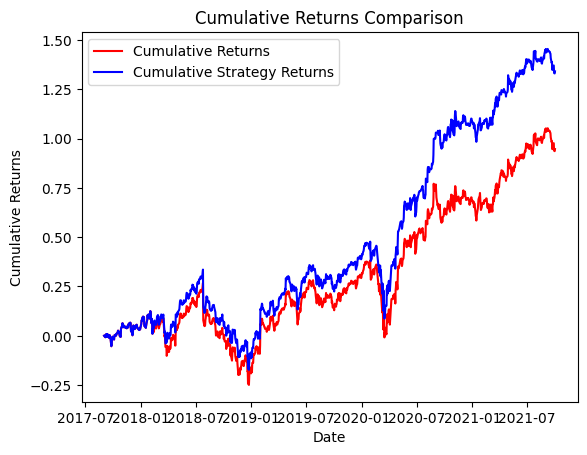

Date        Open        High         Low       Close  \
2354 2021-09-27  349.809998  355.149994  347.079987  353.579987   
2355 2021-09-28  347.970001  349.600006  338.920013  340.649994   
2356 2021-09-29  343.149994  345.230011  338.880005  339.609985   
2357 2021-09-30  340.450012  342.799988  338.149994  339.390015   
2358 2021-10-01  341.609985  345.010010  338.640015  343.010010   

      FB MAU (millions)  TWTR Close  SNAP Close  Apple Open  Apple Close  ...  \
2354               2910   65.370003   80.080002  145.470001   145.369995  ...   
2355               2910   62.450001   74.419998  143.250000   141.910004  ...   
2356               2910   60.070000   71.760002  142.470001   142.830002  ...   
2357               2910   60.389999   73.870003  143.660004   141.500000  ...   
2358               2912   61.980000   75.250000  141.899994   142.649994  ...   

      Google High  Google Low  FB Net Income (millions)  \
2354   142.500000  140.500000                      9194   
2355   139.606506  135.699997                      9194   
2356   137.398499  134.250000                      9194   
2357   135.589996  133.000000                      9194   
2358   137.070999  133.377502                     10285   

      FB Lobbying (millions)  ordinal  Predicted_Signal    Return  \
2354                    5.09   738060                 1  0.001757   
2355                    5.09   738061                 1 -0.036569   
2356                    5.09   738062                 1 -0.003053   
2357                    5.09   738063                 1 -0.000648   
2358                    5.42   738064                 0  0.010666   

      Strategy_Return   Cum_Ret  Cum_Strategy  
2354         0.001757  0.976443      1.370529  
2355        -0.036569  0.939874      1.333960  
2356        -0.003053  0.936821      1.330907  
2357        -0.000648  0.936174      1.330259  
2358         0.010666  0.946840      1.340925  

[5 rows x 24 columns]

In [18]:
# Input
X = pd.DataFrame()
X['Open-Close'] = FB_dataframe['Open'] - FB_dataframe['Close']
X['High-Low'] = FB_dataframe['High'] - FB_dataframe['Low']
X['Apple-Open-Close'] = FB_dataframe['Apple Open'] - FB_dataframe['Apple Close']
X['Apple-High-Low'] = FB_dataframe['Apple High'] - FB_dataframe['Apple Low']
X['Google-Open-Close'] = FB_dataframe['Google Open'] - FB_dataframe['Google Close']
X['Google-High-Low'] = FB_dataframe['Google High'] - FB_dataframe['Google Low']
Stock_Trade(X, FB_dataframe)

FB_dataframe.tail()

- Cumulative Returns: 95%
- Cumulative Straategy Returns: 134%